##The dataset contains the following columns##
Transaction ID
Date
Product Category
Product Name
Units Sold
Unit Price
Total Revenue
Region
Payment Method


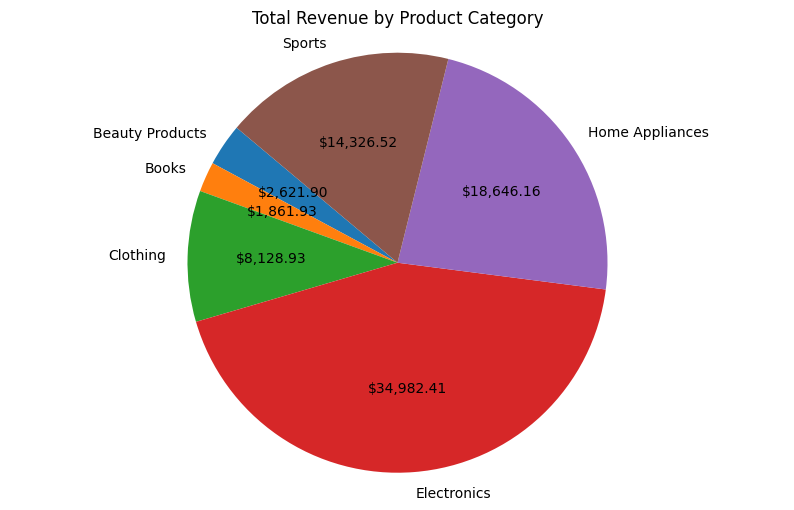

66


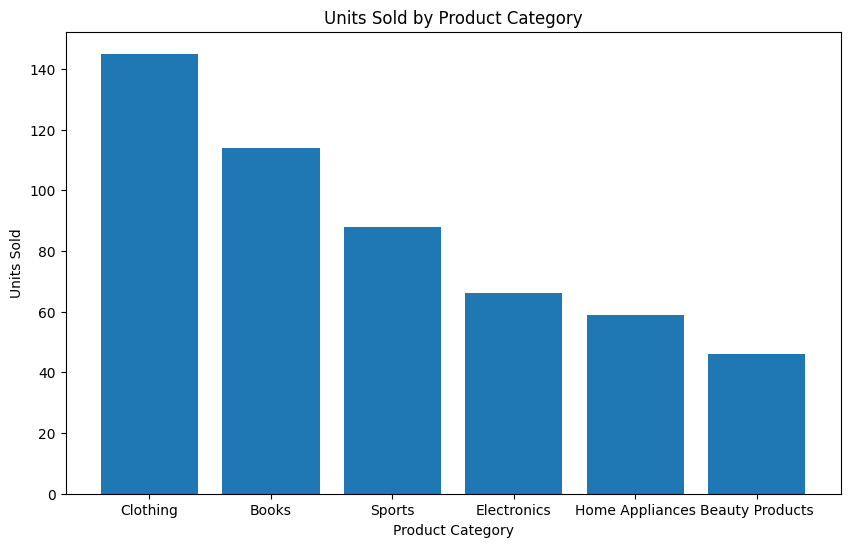

In [13]:
### Jensen Kaplan
## Using a trending kaggle dataset as a playground to display
## analytical skills and data visualization techniques
## ORIGINAL SOURCE: https://www.kaggle.com/datasets/sahilprajapati143/retail-analysis-large-dataset/code

import matplotlib.pyplot as plt
import pandas as pd

# Function to calculate the absolute value of the percentage
# Used to display the total revenue for each category
def absolute_value_rev(val, total):
    return f'${val * total / 100:,.2f}'# Function to calculate the absolute value of the percentage


# Load the dataset
df = pd.read_csv('Online Sales Data.csv')

# Print column names to explore the parameters of the dataset
print('##The dataset contains the following columns##')
for i in df.columns:
    print(i)


# Group by 'Product Category' and sum the 'Total Revenue'
revenue_by_category = df.groupby('Product Category')['Total Revenue'].sum()
# print(revenue_by_category)

# Create the pie chart dispalaying total revenue by product category
plt.figure(figsize=(10, 6))
total_revenue = sum(revenue_by_category)
plt.pie(revenue_by_category, labels=revenue_by_category.index, autopct=lambda val: absolute_value_rev(val, total_revenue), startangle=140)
plt.title('Total Revenue by Product Category')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Display the chart
plt.show()

# electronics_sold = df[df['Product Category']]
electronics_sold = df[df['Product Category'] == 'Electronics']['Units Sold'].sum()
print(electronics_sold)

# Group the data by product category and sum the units sold
counts_by_category = df.groupby('Product Category')['Units Sold'].sum()
# Sort the counts of units sold in descending order
counts_by_category = counts_by_category.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(counts_by_category.index, counts_by_category)

# Add title and labels
plt.title('Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Units Sold')

# Display the chart
plt.show()